In [231]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd

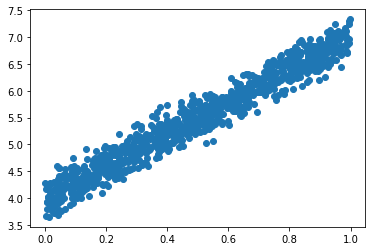

In [232]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)
plt.plot(X,y,'o')
plt.show()

w= [[3.99333678]
 [3.00428714]]


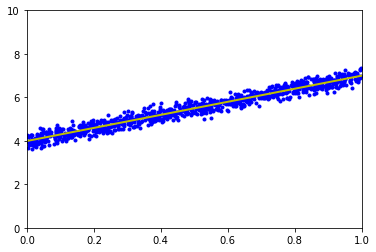

0.014765899999474641

In [233]:
start = timeit.default_timer()
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w=', w)
y0 = w[0][0] + w[1][0]*x0
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w[0][0] + w[1][0]*x0
stop = timeit.default_timer()
time1= stop-start
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()
time1

In [234]:
from sklearn import datasets, linear_model
start = timeit.default_timer()
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)
print ('Nghiệm tìm được bằng scikit-learn  : ', regr.coef_) 
stop = timeit.default_timer()
time2 = stop - start

Nghiệm tìm được bằng scikit-learn  :  [[3.99333678 3.00428714]]


In [235]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(Y - Xbar.dot(w), 2)**2;
def numerical_grad(w, cost):
    eps = 1e-8
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 
start = timeit.default_timer()
w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
stop = timeit.default_timer()
time3= stop - start

In [236]:
print ('Nghiệm tìm được từ numpy: ', w.T, 'thời gian %f s' %time2)
print ('Nghiệm tìm được bằng scikit-learn  : ', regr.coef_,'thời gian: %f s' %(time1) ) 
print('Nghiệm tìm được từ GD: w = ', w1[-1].T, 'thời gian %f s'%(time3) ,'\nsau %d vòng lặp.' %(it1+1))
print(regr.coef_)

Nghiệm tìm được từ numpy:  [[3.99333678 3.00428714]] thời gian 0.013274 s
Nghiệm tìm được bằng scikit-learn  :  [[3.99333678 3.00428714]] thời gian: 0.014766 s
Nghiệm tìm được từ GD: w =  [[4.00823631 2.97685703]] thời gian 0.006933 s 
sau 48 vòng lặp.
[[3.99333678 3.00428714]]


In [246]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
X = np.random.rand(100, 1)
y =  3 * X + 4 + .2*np.random.randn(100)
start = timeit.default_timer()
model = Sequential([Dense(1, input_shape = (1,), activation='linear')])
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics = ['accuracy'])
model.fit(X, y, epochs=100, batch_size=2,verbose=0)
model.get_weights()
stop = timeit.default_timer()
time4 = stop - start
print(time4)

3.109240599998884


In [264]:
a = model.get_weights()
a[1][0]

4.0121737

In [266]:
from pandas import DataFrame
rp= pd.DataFrame({'phuong phap':['numpy', 'scikit-learn','GD','keras'],
                 'time':[time1,time2,time3,time4],
                 'w1':[w[1][0],regr.coef_[0][1],w1[-1][1][0],a[0][0][0]],
                 'w0':[w[0][0],regr.coef_[0][0],w1[-1][0][0],a[1][0]]})
print(rp)
rp_csv = rp.to_csv('sosanh.csv')

    phuong phap      time        w1        w0
0         numpy  0.014766  3.004287  3.993337
1  scikit-learn  0.013274  3.004287  3.993337
2            GD  0.006933  2.976857  4.008236
3         keras  3.109241  2.999999  4.012174
